![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

### Linear Regression

In [125]:
import pandas as pd
df = pd.read_csv('https://github.com/anvarnarz/praktikum_datasets/blob/main/housing_LR.csv?raw=true', index_col=0)

df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [126]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

# Manual (SimpleRegression)

**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [127]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [128]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [129]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

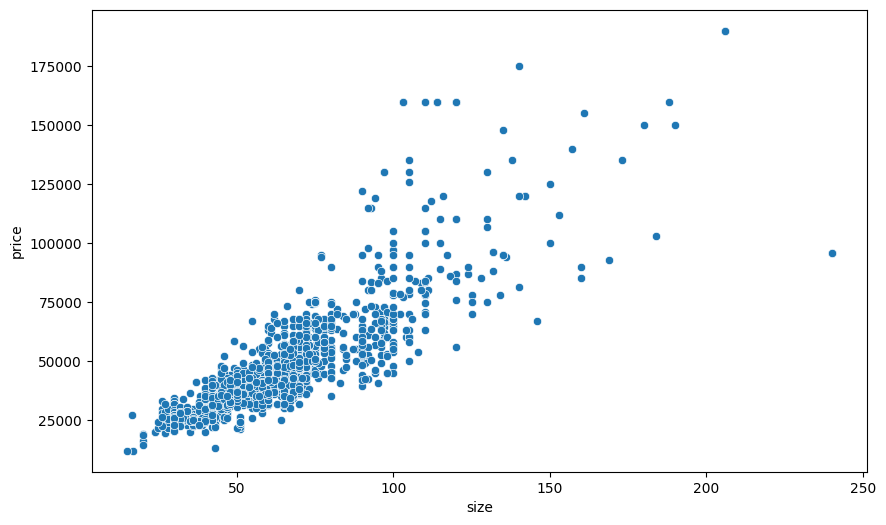

In [131]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=housing, x='size', y='price')

plt.show()

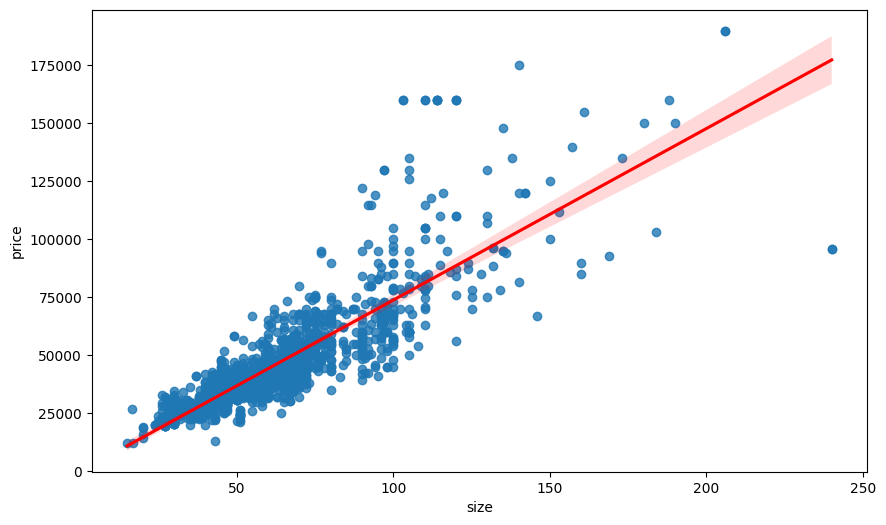

In [132]:
plt.figure(figsize=(10,6))

sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})

plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [133]:
temp = pd.DataFrame({'x': X, 'y': y})

temp['x_without_mean'] = temp['x'] - X.mean()
temp['y_without_mean'] = temp['y'] - y.mean()

temp['x*y'] = temp['x_without_mean'] * temp['y_without_mean']

temp['x_without_mean_square'] = temp['x_without_mean'] ** 2

o1 = temp['x*y'].sum() / temp['x_without_mean_square'].sum()
o1

740.0264822713249

In [134]:
o0 = y.mean() - o1 * X.mean()
o0

-195.94911352666531

## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [135]:
X_test = X.sample(10)

X_test

2984     68.0
3897    114.0
4193     50.0
291      52.0
5935     57.0
7047     72.0
5329     60.0
528      51.0
1367     82.0
6913     68.0
Name: size, dtype: float64

In [136]:
y_test = y.loc[X_test.index]
y_test

2984     68000.0
3897    160000.0
4193     35000.0
291      38000.0
5935     46000.0
7047     66000.0
5329     44800.0
528      26200.0
1367     63500.0
6913     35000.0
Name: price, dtype: float64

In [137]:
labels = o0 + o1 * X_test

labels

2984    50125.851681
3897    84167.069865
4193    36805.375000
291     38285.427965
5935    41985.560376
7047    53085.957610
5329    44205.639823
528     37545.401482
1367    60486.222433
6913    50125.851681
Name: size, dtype: float64

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [138]:
import numpy as np

In [139]:
metric = pd.DataFrame({'true': y_test, 'predicted': labels})

metric

,true,predicted
2984,68000.0,50125.851681
3897,160000.0,84167.069865
4193,35000.0,36805.375000
291,38000.0,38285.427965
5935,46000.0,41985.560376
7047,66000.0,53085.957610
5329,44800.0,44205.639823
528,26200.0,37545.401482
1367,63500.0,60486.222433
6913,35000.0,50125.851681


In [140]:
metric['h(x^i)-y^i'] = metric['true'] - metric['predicted']

mae = np.abs(metric['h(x^i)-y^i']).sum() / metric['h(x^i)-y^i'].count()

mae

14280.575434010598

In [141]:
rmse = metric['h(x^i)-y^i'] ** 2

rmse = rmse.sum() / rmse.count()
rmse = np.sqrt(rmse)
rmse

25735.75951551403

# SimpleRegression

In [142]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [143]:
X = df[['size']]
y = df['price']

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [145]:
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

In [146]:
lr_model.fit(X_train.to_numpy(), y_train.to_numpy())

LinearRegression()

In [147]:
theta1 = lr_model.coef_[0]

print('Theta 1: ', theta1)

Theta 1:  797.7600812318595


In [148]:
theta0 = lr_model.intercept_

print('Theta 0: ', theta0)

Theta 0:  -2010.5609497361438


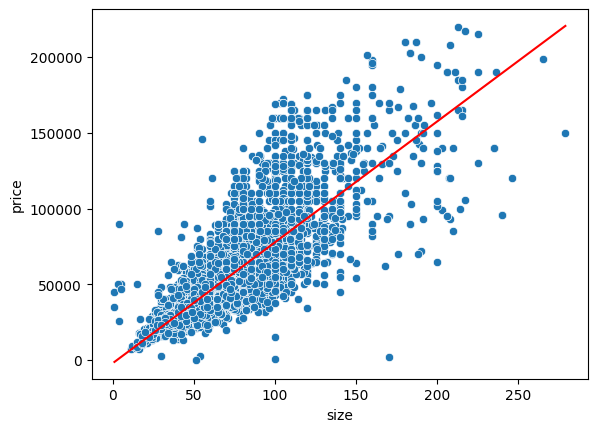

In [149]:
sns.scatterplot(data=df, x='size', y='price')
sns.lineplot(x=df['size'], y=theta1*df['size']+theta0, color='red')

plt.show()

In [150]:
y_test_predicted = lr_model.predict(X_test.to_numpy())

y_test_predicted

array([39472.96327432, 76169.92701099, 31495.362462  , ...,
       57821.44514265, 39472.96327432, 47450.56408664])

In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, y_test_predicted)
print('RMSE: ', np.sqrt(rmse))

RMSE:  18185.08796554313


In [153]:
mae = mean_absolute_error(y_test, y_test_predicted)

print('MAE: ', mae)

MAE:  12314.311243983144
